In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Program_3a_Dataset - Program_3a_Dataset.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

checking for missing values.since the dataset has no missing values.

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

outlier finding for age and duration since they are numerical columns.

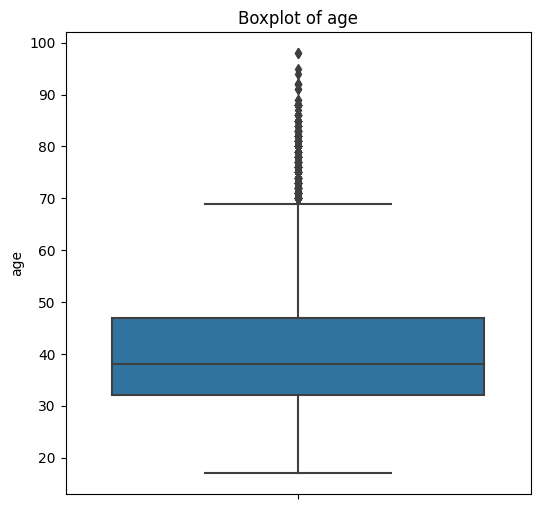

In [ ]:

age_column = 'age'

# Create a box plot for the 'age' column
plt.figure(figsize=(6, 6))
sns.boxplot(y=df[age_column])
plt.title(f'Boxplot of {age_column}')
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

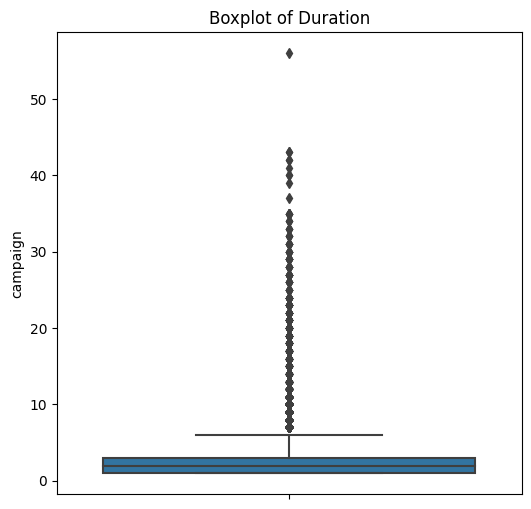

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['campaign'])
plt.title('Boxplot of Duration')
plt.show()

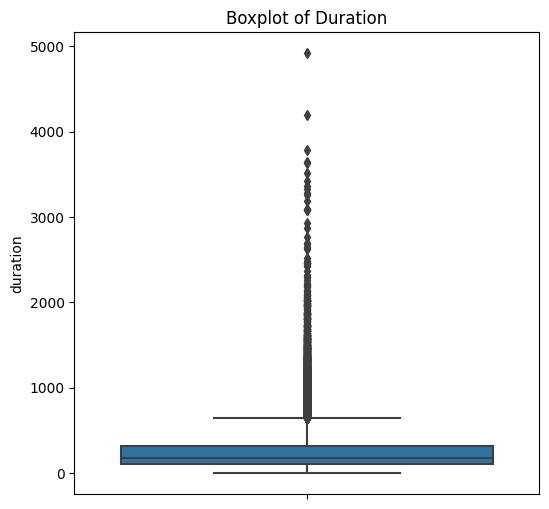

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['duration'])
plt.title('Boxplot of Duration')
plt.show()

both age and duration has so much of outliers we have to manage the outliers.

finding the iqr

In [ ]:
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)
iqr = percentile75 - percentile25


In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print(f'Upper Limit: {upper_limit:.2f}')
print(f'Lower Limit: {lower_limit:.2f}')

Upper Limit: 69.50
Lower Limit: 9.50


In [ ]:
# Remove outliers in the 'age' column
df_no_outliers = df[(df[age_column] >= lower_limit) & (df[age_column] <= upper_limit)]

# Display the shape of the DataFrame before and after removing outliers
print(f'Shape before removing outliers: {df.shape}')
print(f'Shape after removing outliers: {df_no_outliers.shape}')


Shape before removing outliers: (41188, 21)
Shape after removing outliers: (40719, 21)


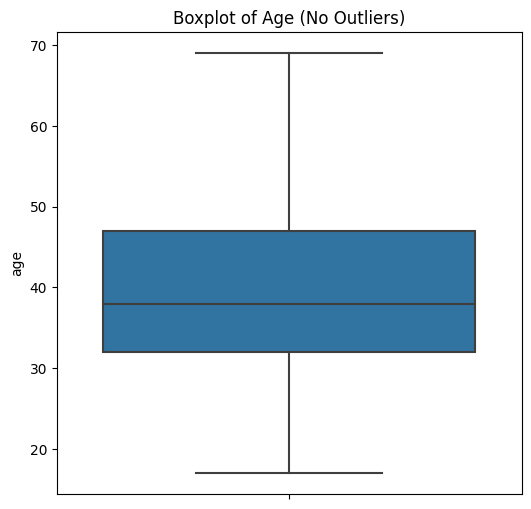

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_no_outliers['age'])
plt.title('Boxplot of Age (No Outliers)')
plt.show()

no outliers in the data now for age


In [ ]:
percentile25 = df['duration'].quantile(0.25)
percentile75 = df['duration'].quantile(0.75)
iqr = percentile75 - percentile25


In [ ]:
pper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f'Upper Limit: {upper_limit:.2f}')
print(f'Lower Limit: {lower_limit:.2f}')

Upper Limit: 69.50
Lower Limit: -223.50


In [ ]:
df_no_outliers = df[(df['duration'] >= lower_limit) & (df['duration'] <= upper_limit)]

# Display the shape of the DataFrame before and after removing outliers
print(f'Shape before removing outliers: {df.shape}')
print(f'Shape after removing outliers: {df_no_outliers.shape}')


Shape before removing outliers: (41188, 21)
Shape after removing outliers: (5431, 21)


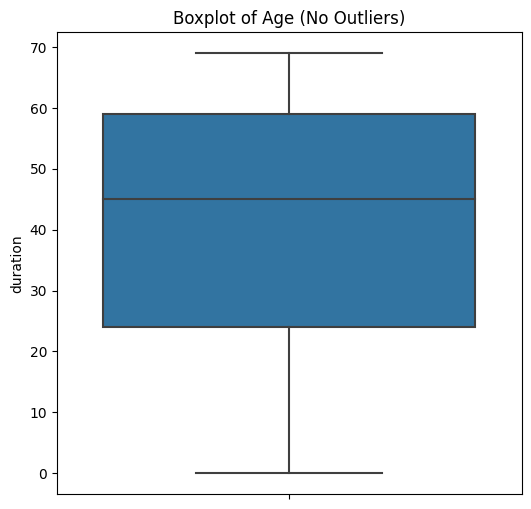

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_no_outliers['duration'])
plt.title('Boxplot of Age (No Outliers)')
plt.show()

outliers have been removed in duration

for campaign

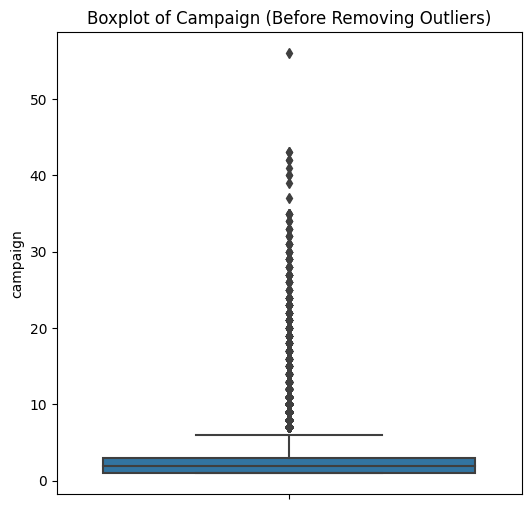

In [ ]:
df['campaign'] = pd.to_numeric(df['campaign'], errors='coerce')

# Display box plot before removing outliers
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['campaign'])
plt.title('Boxplot of Campaign (Before Removing Outliers)')
plt.show()


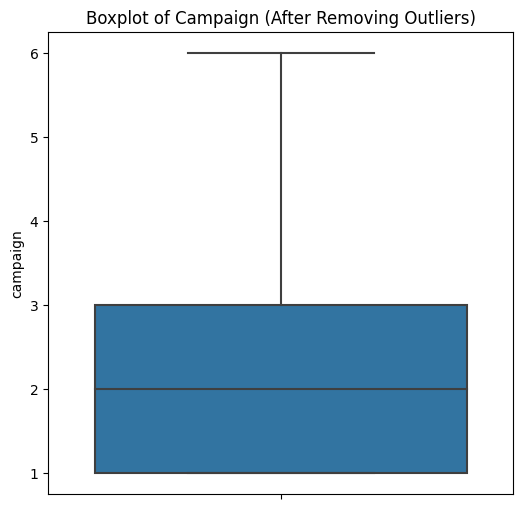

In [ ]:
percentile25 = df['campaign'].quantile(0.25)
percentile75 = df['campaign'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Remove outliers in the 'campaign' column
df_no_outliers = df[(df['campaign'] >= lower_limit) & (df['campaign'] <= upper_limit)]

# Display box plot after removing outliers
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_no_outliers['campaign'])
plt.title('Boxplot of Campaign (After Removing Outliers)')
plt.show()

<ipython-input-37-cfa0eaeeaeb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


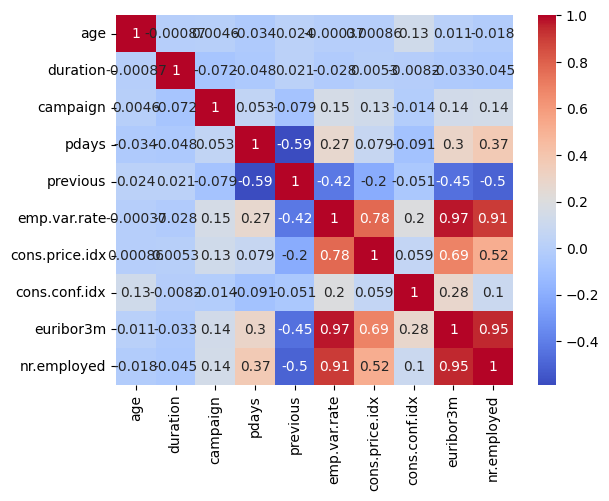

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
X = df[['duration', 'age', 'campaign']]
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
test_preds = model.predict(X_test)


In [ ]:
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [ ]:
print(train_accuracy)
print(test_accuracy)

0.8927543269397523
0.8949583232176095


In [ ]:
print("Classification Report on Test Set:")
print(classification_report(y_test, test_preds))

Classification Report on Test Set:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10969
         yes       0.61      0.18      0.28      1388

    accuracy                           0.89     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.89      0.87     12357



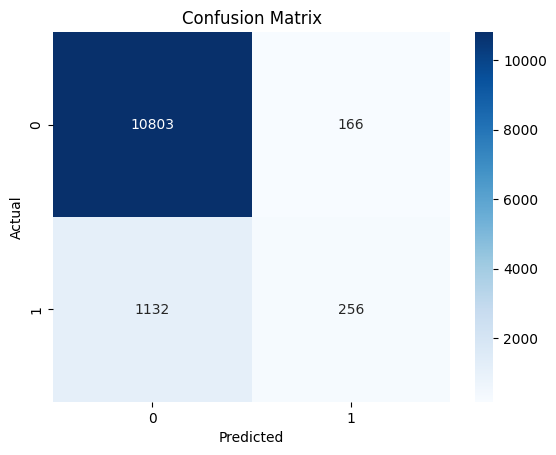

In [ ]:
conf_matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Inference:
# The logistic regression model exhibits high accuracy (89%) on the test set. While effectively predicting negative outcomes, it faces challenges in identifying positive outcomes, emphasizing potential room for improvement in positive predictions.